# Competition 1

## the purpose of this notebook is yada yada yada

backround info on the topic

directions as to what we did (to be filled out later)

here are our steps

In [2]:
# importing proper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn


Here is the data dictionary in used as a reference of column names.
![Variable Dictionary](data_dictionary.PNG)

In [3]:
# create an initial data frame from data supplied to us
df  = pd.read_excel('Competition1_raw_data.xlsx', header=0,)
df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167


# Following the CRISP-DM Model
## It is proper to follow the CRISP-DM Model. Since we have already read our data into a Pandas Dataframe, we move onto the 2nd stage of CRIPS-DM: Data Understanding

## let's do some prelimanry EDA to get a sense of what we are dealing with

## First, let's look at some characteristics including data types, count, and simple distributions

In [3]:
# let's look at column values and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     682 non-null object
P(H)       682 non-null object
P(L)       682 non-null object
P(1Day)    682 non-null object
C1         682 non-null object
C2         682 non-null object
C3         682 non-null object
C4         682 non-null object
C5         682 non-null object
C6         682 non-null object
C7         682 non-null object
T1         682 non-null object
T2         682 non-null object
T3         682 non-null object
T4         682 non-null object
T5         682 non-null object
S1         682 non-null object
S2         682 non-null object
S3         682 non-null object
dtypes: object(22)
memory usage: 117.3+ KB


Hmm, every column is classified as an object. We know that some columns, like C1 should be at least an integer. let's look at a couple of columns to see if they all share a common source error.

In [4]:
df['C1'].value_counts()

-      22
93     15
84     14
77     13
92     13
112    12
91     12
119    12
85     11
78     10
100    10
76     10
104    10
111    10
94     10
98      9
105     9
79      8
70      7
90      7
89      7
147     7
124     7
83      7
140     7
106     7
107     7
72      7
118     6
133     6
       ..
161     1
506     1
153     1
658     1
131     1
203     1
206     1
257     1
25      1
251     1
243     1
307     1
241     1
240     1
237     1
234     1
233     1
230     1
227     1
207     1
226     1
225     1
736     1
223     1
222     1
218     1
217     1
215     1
213     1
520     1
Name: C1, Length: 245, dtype: int64

There are 22 instances of "-", which, as described by the data dictionary, is a missing value. This format is not very useful, so we will convert all '-' to NaN values.  

In [5]:
df = df.replace('-', np.NaN)

In [6]:
df.head(20)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


checkpoint 1

In [7]:
#check to to see if adding 'NaN' fixed problem above
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB
None


Columns I1, I2, I3, are now correcly labeled as strings. 

In [8]:
print(df.columns)

Index(['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'],
      dtype='object')


In [9]:
#find out missing values
names = []
value = []
for col in df.columns:
    names.append(col)
    value.append(df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1],"""     """, "Percentage of missing values:", names[-1], round((value[-1]/682)*100))
    
    

number of missing values:  I1 0       Percentage of missing values: I1 0.0
number of missing values:  I2 0       Percentage of missing values: I2 0.0
number of missing values:  I3 8       Percentage of missing values: I3 1.0
number of missing values:  P(IPO) 5       Percentage of missing values: P(IPO) 1.0
number of missing values:  P(H) 10       Percentage of missing values: P(H) 1.0
number of missing values:  P(L) 10       Percentage of missing values: P(L) 1.0
number of missing values:  P(1Day) 22       Percentage of missing values: P(1Day) 3.0
number of missing values:  C1 22       Percentage of missing values: C1 3.0
number of missing values:  C2 22       Percentage of missing values: C2 3.0
number of missing values:  C3 36       Percentage of missing values: C3 5.0
number of missing values:  C4 22       Percentage of missing values: C4 3.0
number of missing values:  C5 6       Percentage of missing values: C5 1.0
number of missing values:  C6 6       Percentage of missing values:

Creating a pandas profile report

In [10]:
#trying out pandas profiling
#import pandas_profiling as pp
#pfr = pp.ProfileReport(df)

In [11]:
#pfr.to_file('df_profile_report')

Going through the variables individually from the report, here are some notes about missing values, extreme values, and strategies to keep in mind moving forward.

Starting with the IPO characteristics:
- C1: 22 missing values, skewed right. Have to determine appropriate imputation method (ffill, bfill, interpolation?)
- C2: 22 missing values, but a dummy/binary variable. can use possible ml (logistic regression) method to impute missing values.
- C3: 36 missing values, strong skewness, strong outliers. Will have to smooth this variable's noise. 
- C4: 22 missing values, fairly normal distribution. Dealing with ratio/returns here, so shouldn't be much noise. Mean/median imputation might be useable
- C5: 6 missing values, # shares outstanding, so range is very large; might look like outliers, but can't treat as so since it actually is true. Missing values might actually be able to look up.
- C6: 6 mising values, # offering shares, so similar story to C5
- C7: __72__ missing values, might be outliers at end range of values, but "not really" outliers. Imputing challenge.

Looking at the Textual characteristics:
- T1: 1 missing value, slightly skewed with some high outliers. Since only 1 missing value, might be appropriate to simply impute with median.
- T2: Has minimum value of 0, which is puzzling. Highly correlated with T1 (.93). Would be appropriate to dismiss this variable.
- T3: Has minimum value of 0, which is puzzling. Highly correlated with T2 (.95). Also would be appropriate to dismiss thi variable.
- T4: Has minimum value of 0, which is puzzling. Highly correlated with T3 (.96). Appropriate to dismiss this variable
- T5: 1 missing value, with one very large outlier. Will have to handle this outlier. Has a nonsensical value of -1, need to clean this. 

Looking at sentiment characterisitics:
- S1: 1 missing value, slightly skewed right. Also minimum value of -1, which is nonsensical. Must handle such exceptions
- S2: 1 missing value, poisson distribution. Some high outliers. 
- S3: 1 missing value, skewed right. Fairly "stable" variable; not much quirkiness.

Looking at IPO Pricing:
- P(IPO): 5 missing values, slightly skewed right. This is final IPO offering price, which may be researchable.
- P(H): 10 missing values, but contains a value of 0, which wouldn't make sense. Also large outlier needs to be handled.
- P(L): Almost perfectly correlating with P(H) (.99). Can be dropped AFTER making target variable calculations. 
- P(1Day): 22 missing values, also has value of 0. Need to research if values like this and in P(H) make sense. Also two large outliers. 

Lastly,
- I3: 8 missing values, imputing will be need to be done manually by researching the corresponding company.


### Some variables have nonsensical values, like a value of -1 in T5. Thus, here is a quick summary of any nonsensical values that may arise in our dataset. 

* Missing Values
* Value of -1 in T5 and S1; can't have a negative number in these columns.
* Value of 0 in P(1Day); wouldn't make sense for a stock to cost 0$ at end of trading day.
* Values of 0 in T2, T3, and T4, which may or may not be a error (could be there was no MD%A).
* Possible outliers
 



# Task 1: Start filling in missing values for columns

### We'll start with filling in the more simple cases, such as a column only having a few missing values. We will start with the columns in the Sentiment section. 

#### Cleaning the missing data in the Sentiment section 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


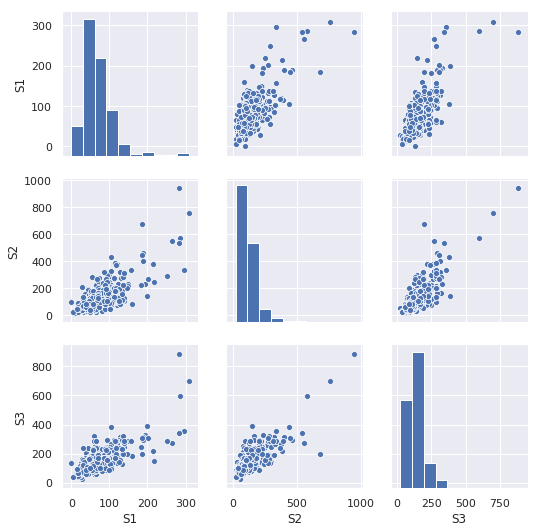

In [12]:
# create a pair pot to show distributions
sentiment = ["S1", "S2", "S3"]

Sentiment = df[sentiment]

sns.pairplot(Sentiment)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ba8c284e0>,
      dtype=object)

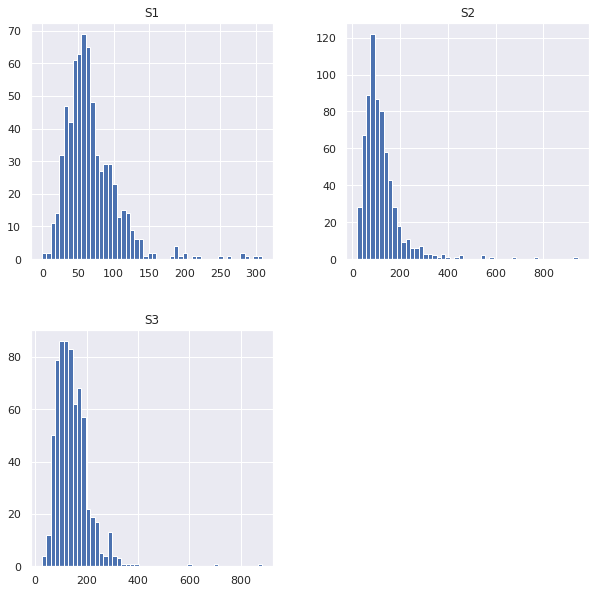

In [13]:
# show the distrubion of these columnns in finer detail
Sentiment.hist(figsize = (10, 10), bins=50)

Since there is only 1 missing value for each column, we will impute with the median.

In [14]:
# fill in missing values for all 3 Sentiment columns with median
# verify all missing values are filled
for col in df.columns[19:]:
    df[col] = df[col].fillna(df[col].median())
    print(df[col].isnull().sum())

0
0
0


### Filling in missing values in Textual Characteristics
Since there was a missing value in each Text charactersitic column, we will simply impute with the median.

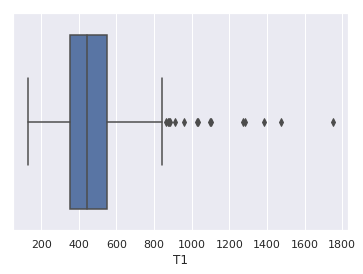

In [15]:
#T1 distributions
sns.boxplot(df['T1'])



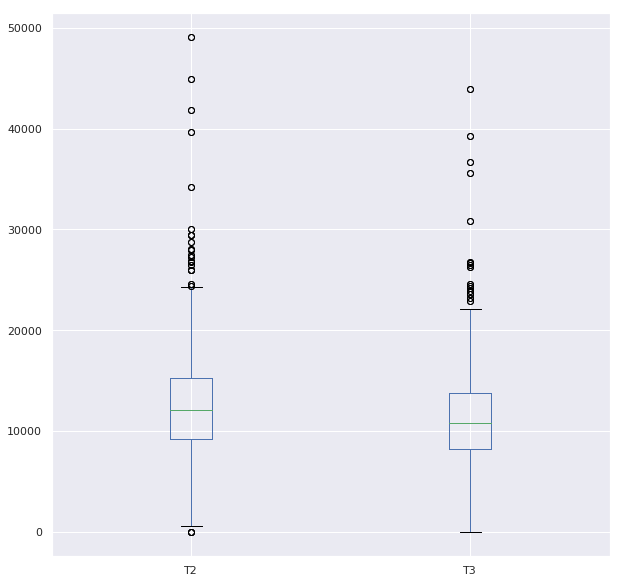

In [16]:
# repeat process for rest of text variables
words = ['T2', 'T3']
long_sentence_and_word = ['T4', 'T5']
for index in df[words]:
    df.boxplot(column = words, figsize=(10,10))

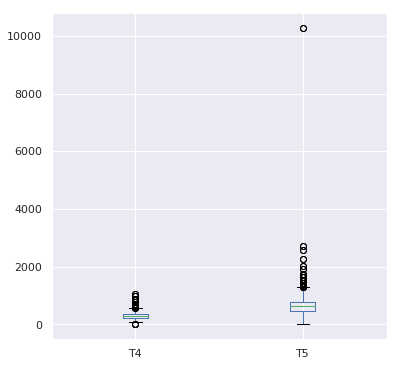

In [17]:
for index in df[long_sentence_and_word]:
    df.boxplot(column = long_sentence_and_word, figsize=(6,6))

In [18]:
# fill in missing values for all 5 columns with median

for col in df.columns[14:19]:
    df[col] = df[col].fillna(df[col].median())
    print(df[col].isnull().sum())

0
0
0
0
0


### Cleaning 'I3'

In [19]:
#create a dataframe of 8 rows with missing values in I3
I3_missing = df[df.I3.isnull()]
I3_missing

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,332.0,7534.0,6747.0,169.0,263.0,51.0,65.0,74.0
86,BLT,BLOUNT INTERNATIONAL INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,538.0,12732.0,11126.0,301.0,631.0,94.0,172.0,116.0
268,GSL,GLOBAL SIGNAL INC,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,NaN,631.0,19479.0,17409.0,451.0,976.0,71.0,252.0,155.0
330,KFI,KKR Financial Holdings LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0
400,NAUH,"National American University Holdings, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,290.0,8454.0,7137.0,192.0,384.0,45.0,68.0,139.0
490,RCH,"CHINA CGAME, INC.",NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,737000.0,NaN,322.0,9820.0,8893.0,230.0,410.0,61.0,92.0,91.0
597,TRMM,"Access to Money, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,494.0,12004.0,10226.0,277.0,560.0,46.0,100.0,91.0
614,TZOO,TRAVELZOO INC,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,146.0,3600.0,3189.0,88.0,181.0,5.0,26.0,38.0


Sources for code information: https://www.sec.gov/edgar/searchedgar/companysearch.html

In [20]:
# Fill in correct SIC code
# going one company at a time. 
# ADKU
df.iloc[10, 2] =  "8051"

# BLT
df.iloc[86, 2] = '3420'

# GSL
df.iloc[268, 2] = '6798'

# KFI
df.iloc[330, 2] = '6199'

# NAUH
df.iloc[400, 2] = '8200'

# RCH
df.iloc[490, 2] = '8711'

# TRMM
df.iloc[597, 2] = '7200'

# TZOO
df.iloc[614, 2] = '7373'


During our corrections, we also found that some companies have the same 6 digit SIC. SIC should only b3 four digits; upon cross-reference with Edgar, we found the actually SIC code, as shown below.

In [21]:

df.iloc[246, 2] = '8742'


Some companies have multiple 4 digit SIC, seperated by commas. We only need one primary 4 digit code.


In [22]:
# converting all values in I3 to strings,
# then finding all instances of SIC not equal to 4
df.I3 = df.I3.astype(str)
df.I3.loc[df.I3.str.len() != 4]

118                       100
174    6794, 3861, 3663, 7819
181                       100
187          3651, 6794, 7819
221                    541990
499          3663, 3861, 6794
620                7389, 5063
Name: I3, dtype: object

3 digit codes do exist, therefore we will fix the instances with more than one 4-digit code, like row 174

In [23]:
#fixing codes
df.iloc[174, 2] = '6794'

df.iloc[187, 2] = '6794'

df.iloc[499, 2] = '3663'

df.iloc[620, 2] = '5063'

df.iloc[246, 2] = '8742'

df.iloc[221, 2] = '7389'

In [24]:
# check to make sure code above worked
df.I3.loc[df.I3.str.len() != 4]

118    100
181    100
Name: I3, dtype: object

## Cleaning missing Values

Cleaning the IPO characteristics

In [25]:
#for conveniance, change I3 to a float to allow for binning
df["I3"] = df["I3"].astype(float)

In [26]:
#define bins
bins =[0,999,1499,1799,1999,3999,4999,5199,5999,6799,8999,9729,9999]
#names
group_names=["Agriculture Forestry and Fishing","Mining","Construction","not used","Manufacturing","Transportation Communications, Electric, Gas and Sanitary service","Wholesale Trade","Retail Trade","Finance, Insurance and Real Estate","Services","Public Administration","Nonclassifiable"]

df["Bins"] = pd.cut(df["I3"],bins,labels= group_names)


In [27]:
#changing I3 back to a sting object
df["I3"] = df["I3"].astype(str)

In [28]:
df.iloc[10, 3] = df.loc[df['Bins'] == "Services", 'P(IPO)'].mean()
df.iloc[400, 3] = df.loc[df['Bins'] == "Services", 'P(IPO)'].mean()
df.iloc[597, 3] = df.loc[df['Bins'] == "Services", 'P(IPO)'].mean()

df.iloc[86, 3] = df.loc[df['Bins'] == "Manufacturing", 'P(IPO)'].mean()
df.iloc[330, 3] = df.loc[df['Bins'] == "Finance, Insurance and Real Estate", 'P(IPO)'].mean()

In [29]:
#create a dataframe of 8 rows with missing values in I3
PH = df[df['P(H)'].isnull()]
PH

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C7,T1,T2,T3,T4,T5,S1,S2,S3,Bins
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",8051.0,14.667561,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,332.0,7534.0,6747.0,169.0,263.0,51.0,65.0,74.0,Services
86,BLT,BLOUNT INTERNATIONAL INC,3420.0,12.556818,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,538.0,12732.0,11126.0,301.0,631.0,94.0,172.0,116.0,Manufacturing
215,ESEA,EUROSEAS LTD.,4412.0,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,521.0,12812.0,11190.0,285.0,545.0,72.0,60.0,121.0,"Transportation Communications, Electric, Gas a..."
268,GSL,GLOBAL SIGNAL INC,6798.0,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,631.0,19479.0,17409.0,451.0,976.0,71.0,252.0,155.0,"Finance, Insurance and Real Estate"
330,KFI,KKR Financial Holdings LLC,6199.0,17.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0,"Finance, Insurance and Real Estate"
400,NAUH,"National American University Holdings, Inc.",8200.0,14.667561,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,290.0,8454.0,7137.0,192.0,384.0,45.0,68.0,139.0,Services
490,RCH,"CHINA CGAME, INC.",8711.0,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,322.0,9820.0,8893.0,230.0,410.0,61.0,92.0,91.0,Services
560,STRL,STERLING CONSTRUCTION CO INC,1600.0,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,310.0,7195.0,6393.0,172.0,325.0,44.0,65.0,85.0,Construction
597,TRMM,"Access to Money, Inc.",7200.0,14.667561,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,494.0,12004.0,10226.0,277.0,560.0,46.0,100.0,91.0,Services
614,TZOO,TRAVELZOO INC,7373.0,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,146.0,3600.0,3189.0,88.0,181.0,5.0,26.0,38.0,Services


In [30]:
#(df['P(H)']-df['P(IPO)']).mean()

In [31]:
# Fill in correct SIC code
# going one company at a time. 
# ADKU
df.iloc[215, 4] =  df.iloc[215,3] + (df['P(H)']-df['P(IPO)']).mean()
# BLT
df.iloc[268, 4] = df.iloc[268,3] + (df['P(H)']-df['P(IPO)']).mean()

# GSL
df.iloc[490, 4] = df.iloc[490,3] + (df['P(H)']-df['P(IPO)']).mean()

# KFI
df.iloc[560, 4] = df.iloc[560,3] + (df['P(H)']-df['P(IPO)']).mean()

# NAUH
df.iloc[614, 4] = df.iloc[614,3] + (df['P(H)']-df['P(IPO)']).mean()

# ADKU
df.iloc[10, 4] =  df.iloc[10,3] + (df['P(H)']-df['P(IPO)']).mean()
# BLT
df.iloc[86, 4] = df.iloc[86,3] + (df['P(H)']-df['P(IPO)']).mean()

# GSL
df.iloc[330, 4] = df.iloc[330,3] + (df['P(H)']-df['P(IPO)']).mean()

# KFI
df.iloc[400, 4] = df.iloc[400,3] + (df['P(H)']-df['P(IPO)']).mean()

# NAUH
df.iloc[597, 4] = df.iloc[597,3] + (df['P(H)']-df['P(IPO)']).mean()



In [32]:
(df['P(L)']-df['P(IPO)']).mean()

-0.3556398809523809

In [33]:
# Fill in correct SIC code
# going one company at a time. 
# ADKU
df.iloc[215, 5] =  df.iloc[215,3] + (df['P(L)']-df['P(IPO)']).mean()
# BLT
df.iloc[268, 5] = df.iloc[268,3] + (df['P(L)']-df['P(IPO)']).mean()

# GSL
df.iloc[490, 5] = df.iloc[490,3] + (df['P(L)']-df['P(IPO)']).mean()

# KFI
df.iloc[560, 5] = df.iloc[560,3] + (df['P(L)']-df['P(IPO)']).mean()

# NAUH
df.iloc[614, 5] = df.iloc[614,3] + (df['P(L)']-df['P(IPO)']).mean()

df.iloc[10, 5] =  df.iloc[10,3] + (df['P(L)']-df['P(IPO)']).mean()
# BLT
df.iloc[86, 5] = df.iloc[86,3] + (df['P(L)']-df['P(IPO)']).mean()

# GSL
df.iloc[330, 5] = df.iloc[330,3] + (df['P(L)']-df['P(IPO)']).mean()

# KFI
df.iloc[400, 5] = df.iloc[400,3] + (df['P(L)']-df['P(IPO)']).mean()

# NAUH
df.iloc[597, 5] = df.iloc[597,3] + (df['P(L)']-df['P(IPO)']).mean()



In [34]:
(df['P(1Day)']-df['P(IPO)']).mean()

11.900144937237393

In [35]:
#create a dataframe of 8 rows with missing values in I3
PH = df[df['P(1Day)'].isnull()]
PH

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C7,T1,T2,T3,T4,T5,S1,S2,S3,Bins
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",8051.0,14.667561,16.278067,14.311921,NaN,NaN,NaN,NaN,...,NaN,332.0,7534.0,6747.0,169.0,263.0,51.0,65.0,74.0,Services
86,BLT,BLOUNT INTERNATIONAL INC,3420.0,12.556818,14.167324,12.201178,NaN,NaN,NaN,NaN,...,NaN,538.0,12732.0,11126.0,301.0,631.0,94.0,172.0,116.0,Manufacturing
115,CELM,"CHINA ELECTRIC MOTOR, INC.",3621.0,4.500000,6.500000,5.500000,NaN,NaN,NaN,NaN,...,NaN,351.0,10352.0,9296.0,235.0,482.0,52.0,124.0,120.0,Manufacturing
123,CIL,"China Intelligent Lighting & Electronics, Inc.",3640.0,3.000000,5.000000,4.000000,NaN,NaN,NaN,59.261,...,59.261,406.0,12065.0,11056.0,282.0,667.0,72.0,169.0,182.0,Manufacturing
203,ELMD,"Electromed, Inc.",3845.0,4.000000,6.000000,4.000000,NaN,NaN,NaN,12.999,...,12.999,224.0,6146.0,5551.0,154.0,386.0,29.0,52.0,140.0,Manufacturing
215,ESEA,EUROSEAS LTD.,4412.0,7.000000,8.610506,6.644360,NaN,NaN,NaN,NaN,...,NaN,521.0,12812.0,11190.0,285.0,545.0,72.0,60.0,121.0,"Transportation Communications, Electric, Gas a..."
217,EURX,EURAND N.V.,2834.0,16.000000,19.000000,17.000000,NaN,NaN,NaN,109.336,...,109.336,444.0,12045.0,10785.0,279.0,624.0,60.0,100.0,134.0,Manufacturing
268,GSL,GLOBAL SIGNAL INC,6798.0,18.000000,19.610506,17.644360,NaN,NaN,NaN,NaN,...,NaN,631.0,19479.0,17409.0,451.0,976.0,71.0,252.0,155.0,"Finance, Insurance and Real Estate"
286,HPJ,"Highpower International, Inc.",3690.0,3.250000,4.000000,3.000000,NaN,NaN,NaN,73.262,...,73.262,377.0,10731.0,9703.0,240.0,486.0,45.0,104.0,96.0,Manufacturing
330,KFI,KKR Financial Holdings LLC,6199.0,17.250000,18.860506,16.894360,NaN,NaN,NaN,NaN,...,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0,"Finance, Insurance and Real Estate"


In [36]:
# Fill in correct SIC code
# going one company at a time. 
# ADKU
df.iloc[115, 6] =  df.iloc[115,3] + (df['P(1Day)']-df['P(IPO)']).mean()
# BLT
df.iloc[123, 6] = df.iloc[123,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# GSL
df.iloc[203, 6] = df.iloc[203,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# KFI
df.iloc[215, 6] = df.iloc[215,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# NAUH
df.iloc[217, 6] = df.iloc[217,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# ADKU
df.iloc[268, 6] =  df.iloc[268,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# BLT
df.iloc[286, 6] = df.iloc[286,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# GSL
df.iloc[357, 6] = df.iloc[357,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# KFI
df.iloc[401, 6] = df.iloc[401,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# NAUH
df.iloc[410, 6] = df.iloc[410,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# ADKU
df.iloc[490, 6] =  df.iloc[490,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# BLT
df.iloc[496, 6] = df.iloc[496,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# GSL
df.iloc[503, 6] = df.iloc[503,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# KFI
df.iloc[560, 6] = df.iloc[560,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# NAUH
df.iloc[597, 6] = df.iloc[597,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# GSL
df.iloc[614, 6] = df.iloc[614,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# KFI
df.iloc[615, 6] = df.iloc[615,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# NAUH
df.iloc[675, 6] = df.iloc[675,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# KFI
df.iloc[10, 6] = df.iloc[10,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# NAUH
df.iloc[86, 6] = df.iloc[86,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# GSL
df.iloc[330, 6] = df.iloc[330,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# KFI
df.iloc[400, 6] = df.iloc[400,3] + (df['P(1Day)']-df['P(IPO)']).mean()

# NAUH
df.iloc[597, 6] = df.iloc[597,3] + (df['P(1Day)']-df['P(IPO)']).mean()

In [37]:
#create a dataframe of 8 rows with missing values in I3
PH = df[df['Bins'].isnull()]
PH

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C7,T1,T2,T3,T4,T5,S1,S2,S3,Bins


# Cleaning the IPO Characteristics Columns

Remaining missing value field are in the IPO characteristic columns. For this section, we will use the python library 'impyute', which has many methods of imputation in a dataset. First we will need to properly format our dataset. 
- (Documentation: https://impyute.readthedocs.io/en/master/user_guide/overview.html)


In [38]:
import impyute

# impytute requires a numpy array, so let's format one based on our data.
# Rather than transforming textual data,
# we simply drop these columns, as they are only identification-type columns.

imp_df = df.drop(columns=['I1', 'I2', 'I3', 'Bins'])
imp_df = imp_df.values
imp_df



array([[ 10. ,   9.5,   8.5, ...,  62. , 117. , 139. ],
       [  8. ,  10. ,   8. , ...,  71. , 242. , 237. ],
       [  7. ,  14. ,  12. , ...,  61. ,  33. ,  60. ],
       ...,
       [  8. ,   8.5,   7.5, ...,  38. ,  82. ,  90. ],
       [ 19. ,  17. ,  15. , ...,  48. ,  38. , 100. ],
       [ 16. ,  16. ,  14. , ...,  94. , 103. , 158. ]])

Our main strategy for imputation is MICE. Here is a brief explanation of this method: __EXPLANATION HERE:__

Multivariate Imputation by Chained Equations:

In [39]:
# MICE imputation
imp_mice_df = impyute.imputation.cs.mice(imp_df)
np.isnan(imp_mice_df).any()

False

Need to add back the columns that we dropped earlier to our new clean dataframe.

In [40]:
# Convert numpy array back to pandas dataframe
clean_df = pd.DataFrame(imp_mice_df)

# Adding back in column names
clean_df.columns = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']

# joining the textual characteristics to the new clean_df
clean_df = clean_df.join(df[['I1', 'I2', 'I3', 'Bins']])

#verify that all nulls are filled. 

clean_df



,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T3,T4,T5,S1,S2,S3,I1,I2,I3,Bins
0,10.000000,9.500000,8.500000,11.870000,122.000000,1.000000,3.430000,0.029074,4.096205e+07,1.060000e+07,...,11560.0,301.0,690.0,62.0,117.0,139.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,Manufacturing
1,8.000000,10.000000,8.000000,7.250000,259.000000,0.000000,-1.620000,-0.013352,2.886920e+07,2.400000e+06,...,19585.0,510.0,1120.0,71.0,242.0,237.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,Manufacturing
2,7.000000,14.000000,12.000000,6.700000,90.000000,1.000000,-1.240000,0.020715,1.684567e+07,5.000000e+06,...,4785.0,128.0,325.0,61.0,33.0,60.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,Manufacturing
3,11.500000,16.000000,14.000000,12.390000,209.000000,1.000000,-0.910000,0.020023,1.484864e+07,4.500000e+06,...,7574.0,177.0,509.0,80.0,59.0,110.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,Manufacturing
4,21.000000,21.000000,19.000000,56.599998,80.000000,1.000000,0.070000,-0.034895,3.074172e+07,8.250000e+06,...,13176.0,336.0,720.0,67.0,149.0,167.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,"Transportation Communications, Electric, Gas a..."
5,13.500000,14.500000,12.500000,14.200000,94.000000,1.000000,0.060000,-0.057556,4.240292e+07,7.407407e+06,...,13934.0,328.0,815.0,62.0,96.0,181.0,ACOM,Ancestry.com Inc.,7379.0,Services
6,6.000000,13.000000,11.000000,6.720000,128.000000,1.000000,-1.870000,0.004106,1.904702e+07,5.500000e+06,...,13953.0,379.0,698.0,82.0,106.0,135.0,ACOR,ACORDA THERAPEUTICS INC,2836.0,Manufacturing
7,5.000000,14.000000,12.000000,4.550000,91.000000,0.000000,-0.740000,0.040620,1.937175e+07,8.000000e+06,...,10056.0,276.0,-1.0,55.0,120.0,122.0,ACRX,ACELRX PHARMACEUTICALS INC,2834.0,Manufacturing
8,15.000000,18.000000,16.000000,15.900000,100.000000,1.000000,-0.510000,-0.029316,5.298250e+07,1.100000e+07,...,13463.0,335.0,917.0,58.0,124.0,234.0,ACTV,ACTIVE NETWORK INC,7372.0,Services
9,9.000000,19.000000,17.000000,0.000000,106.000000,1.000000,1.490000,-0.024925,3.362269e+07,1.100000e+07,...,8107.0,198.0,459.0,81.0,90.0,147.0,ACW,ACCURIDE CORP,3714.0,Manufacturing


Now we have a full dataset, with no missing values. Our next task is to remove other nonsensical values.

# Task 2: Cleaning nonsensical values

## Cleaning Textual columnns

Here is a reminder of our tasks. We have fixed the missing values, now we move onto the next couple of bulleted points. 

* Missing Values
* Value of -1 in T5 and S1; can't have a negative number in these columns.
* Value of 0 in P(1Day); wouldn't make sense for a stock to cost 0$ at end of trading day.
* Values of 0 in T2, T3, and T4, which may or may not be a error (could be there was no MD%A).
* Possible outliers
 



Bullet 3: fixing values of 0 based on the industry the company falls into and use its central tendency value

In [41]:
clean_df.loc[df['P(1Day)'] == 0]

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T3,T4,T5,S1,S2,S3,I1,I2,I3,Bins
9,9.0,19.0,17.0,0.0,106.0,1.0,1.490000,-0.024925,33622690.0,11000000.0,...,8107.0,198.0,459.0,81.0,90.0,147.0,ACW,ACCURIDE CORP,3714.0,Manufacturing
266,17.0,18.0,16.0,0.0,108.0,1.0,0.230000,-0.006352,70375494.0,7500000.0,...,16262.0,397.0,959.0,85.0,228.0,173.0,GSAT,"Globalstar, Inc.",4899.0,"Transportation Communications, Electric, Gas a..."
279,20.0,20.0,18.0,0.0,111.0,1.0,1.788904,0.007191,30242850.0,9200000.0,...,11207.0,297.0,603.0,49.0,103.0,135.0,HERO,"HERCULES OFFSHORE, INC.",1381.0,Mining
364,6.0,8.0,6.0,0.0,85.0,0.0,-0.950000,0.007191,15704952.0,4000000.0,...,5085.0,132.0,284.0,27.0,66.0,63.0,MATH,SAJAN INC,3674.0,Manufacturing


In [42]:
# make dummy series containing P(1Day) - P(IPO)
clean_df['difference'] = clean_df['P(1Day)'] - clean_df['P(IPO)']


In [43]:
# Here is code for this
group = clean_df.groupby('Bins').agg(np.median)['difference']
print(group)

 

Bins
Agriculture Forestry and Fishing                                     52.590001
Mining                                                                0.000000
Construction                                                          6.130072
not used                                                                   NaN
Manufacturing                                                         1.000000
Transportation Communications, Electric, Gas and Sanitary service     0.100000
Wholesale Trade                                                       0.055000
Retail Trade                                                          1.075000
Finance, Insurance and Real Estate                                    6.510000
Services                                                              1.795000
Public Administration                                                      NaN
Nonclassifiable                                                            NaN
Name: difference, dtype: float64


In [44]:
# plugging in missing values for four rows above. 

#ACW
clean_df.iloc[9,3] = clean_df.iloc[9,0] + group[4]

# GSAT
clean_df.iloc[266,3] = clean_df.iloc[266, 0] +group[5]

#HERO
clean_df.iloc[279, 3] = clean_df.iloc[279, 0] + group[1]

#MATH
clean_df.iloc[364, 3] = clean_df.iloc[364, 0] + group[4]

In [45]:
clean_df.iloc[9,:]

P(IPO)                    9
P(H)                     19
P(L)                     17
P(1Day)                  10
C1                      106
C2                        1
C3                     1.49
C4               -0.0249251
C5              3.36227e+07
C6                  1.1e+07
C7                  494.008
T1                      385
T2                     9134
T3                     8107
T4                      198
T5                      459
S1                       81
S2                       90
S3                      147
I1                      ACW
I2            ACCURIDE CORP
I3                   3714.0
Bins          Manufacturing
difference               -9
Name: 9, dtype: object

Finished cleaning 0 values for P(1Day)

## Clean any negative values

Cleaning negative values in T1 and S1

In [46]:
clean_df.loc[clean_df['T5'] <= 0]

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T4,T5,S1,S2,S3,I1,I2,I3,Bins,difference
7,5.0,14.0,12.0,4.55,91.0,0.0,-0.74,0.04062,19371750.0,8000000.0,...,276.0,-1.0,55.0,120.0,122.0,ACRX,ACELRX PHARMACEUTICALS INC,2834.0,Manufacturing,-0.45


In [47]:
clean_df.loc[clean_df['S1'] <= 0]

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T4,T5,S1,S2,S3,I1,I2,I3,Bins,difference
134,12.0,12.0,10.0,17.98,133.0,1.0,0.14,0.008014,78000000.0,18000000.0,...,259.0,643.0,-1.0,97.0,134.0,COGT,"Cogent, inc.",7373.0,Services,5.98


In [48]:
clean_df.columns

Index(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'I1', 'I2', 'I3',
       'Bins', 'difference'],
      dtype='object')

Since there is only 1 value for each case, we will impute with the median, as we did with the Textual characteristics and Sentiment characteristics

In [49]:
t5_median = np.median(clean_df['T5'])
s1_median = np.median(clean_df['S1'])


#substituting values in
clean_df['T5'] = clean_df['T5'].replace(-1, t5_median)
clean_df['S1'] = clean_df['S1'].replace(-1, s1_median)

Looking at the 2nd to last bullet, if, for some reason, there are no words and/or sentences in a MD&A, then there should also be a consistent value in the other text variabeas as well. Therefore, we need to make sure that everything is actually consistent. Check if there are any instances of:
- more sentences than words (T1 > T2), 
- number of real words greater than number of words (T3 > T2),
- number of long sentences greater than number of sentences (T4 >T1)
- number of long words greater than number of words (T5 > T2)

In [50]:
# Return a dataframe index for each scenario, starting with T1 > T2
T1_T2 = df[df.T1 > df.T2]
T1_T2.index

Int64Index([125, 199], dtype='int64')

In [51]:
#Return dataframe of T3 > T2
#All other bulleted instances are captured in this dataframe as well,
#So this output will be shown (check indexes of each bullet scenario)
T3_T2 = df[df.T3 > df.T2]
T3_T2

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C7,T1,T2,T3,T4,T5,S1,S2,S3,Bins
125,CLD,CLOUD PEAK ENERGY INC.,1221.0,15.00,18.000000,16.00000,14.840000,100.0,1.0,2.00,...,1239.711,656.0,0.0,18173.0,486.0,1135.0,77.0,229.0,219.0,Mining
199,EDG,Edgen Group Inc.,5150.0,11.00,16.000000,14.00000,9.500000,120.0,1.0,-0.59,...,911.612,619.0,0.0,19153.0,474.0,1108.0,104.0,224.0,253.0,Wholesale Trade
330,KFI,KKR Financial Holdings LLC,6199.0,17.25,18.860506,16.89436,29.150145,NaN,NaN,NaN,...,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0,"Finance, Insurance and Real Estate"


In [52]:
#Return dataframe index of T4 > T1
T4_T1 = df[df.T4 > df.T1]
T4_T1.index

Int64Index([330], dtype='int64')

In [53]:
#Return dataframe index of T5 > T2
T5_T2 = df[df.T5 > df.T2]
T5_T2.index

Int64Index([125, 199, 330], dtype='int64')

Only the rows of index 125, 199, and 330 have these errors. Since many text columns have high intercorrelations, it is feasable to only use some of these variables. T1 may be most appropriate, as suggested by pandas profiling report. Also, using just T1 and T5 (number of sentences and number of long words) may be the most logical combination to capture all of the textual characterisitcs (T1,T2,T3,T4,T5), as well as avoiding any logical contradictions. 

In [54]:
# dropping T2, T3 T4 from our dataframe


In [55]:
clean_df = clean_df.drop(columns=['T2', 'T3', 'T4'], axis=1)
clean_df.columns

Index(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'T1', 'T5', 'S1', 'S2', 'S3', 'I1', 'I2', 'I3', 'Bins',
       'difference'],
      dtype='object')

In [56]:
# also drop 'difference', as it is not needed anymore
clean_df = clean_df.drop('difference', axis=1)
clean_df.columns


Index(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'T1', 'T5', 'S1', 'S2', 'S3', 'I1', 'I2', 'I3', 'Bins'],
      dtype='object')

In [57]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 20 columns):
P(IPO)     682 non-null float64
P(H)       682 non-null float64
P(L)       682 non-null float64
P(1Day)    682 non-null float64
C1         682 non-null float64
C2         682 non-null float64
C3         682 non-null float64
C4         682 non-null float64
C5         682 non-null float64
C6         682 non-null float64
C7         682 non-null float64
T1         682 non-null float64
T5         682 non-null float64
S1         682 non-null float64
S2         682 non-null float64
S3         682 non-null float64
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
Bins       682 non-null category
dtypes: category(1), float64(16), object(3)
memory usage: 102.4+ KB


In [58]:
clean_df.sample(10)

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T5,S1,S2,S3,I1,I2,I3,Bins
124,17.000000,17.000000,15.000000,21.000000,137.000000,1.000000,0.260000,-0.002848,1.939131e+07,7.500000e+06,207.502000,444.0,714.0,36.0,108.0,151.0,CLAY,CLAYTON HOLDINGS INC,7389.0,Services
10,14.667561,16.278067,14.311921,26.567706,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,332.0,263.0,51.0,65.0,74.0,ADKU,"ADCARE HEALTH SYSTEMS, INC",8051.0,Services
392,14.000000,13.000000,11.000000,16.260000,37.000000,1.000000,-0.860000,0.017000,3.091132e+07,7.500000e+06,59.558000,581.0,878.0,77.0,109.0,193.0,MRIN,MARIN SOFTWARE INC,7372.0,Services
180,19.000000,18.000000,16.000000,27.850000,84.000000,1.000000,0.220000,-0.000210,1.203916e+08,2.225000e+07,577.135000,436.0,664.0,95.0,234.0,164.0,DNKN,"DUNKIN' BRANDS GROUP, INC.",5810.0,Retail Trade
224,17.000000,17.000000,15.000000,19.719999,76.000000,1.000000,0.590000,0.017114,1.370638e+07,7.500000e+06,78.706000,388.0,554.0,56.0,83.0,125.0,FACE,"PHYSICIANS FORMULA HOLDINGS, INC",2844.0,Manufacturing
648,6.000000,7.000000,6.000000,31.500000,150.000000,0.000000,1.788904,0.043747,6.746365e+06,2.900000e+06,500.459962,235.0,353.0,33.0,77.0,67.0,VTUS,"ASSEMBLY BIOSCIENCES, INC.",2834.0,Manufacturing
292,23.000000,23.000000,21.000000,24.500000,79.000000,1.000000,-1.430000,0.009125,2.204545e+08,6.022727e+07,11485.000000,1032.0,1631.0,189.0,460.0,293.0,HUN,Huntsman CORP,2800.0,Manufacturing
450,18.000000,21.000000,19.000000,17.350000,87.000000,1.000000,-0.640000,-0.017607,1.225806e+08,5.000000e+07,827.070000,1095.0,1638.0,105.0,435.0,382.0,PA,PanAmSat Holding CORP,4899.0,"Transportation Communications, Electric, Gas a..."
414,18.000000,17.000000,15.000000,24.600000,91.000000,1.000000,0.080000,0.012394,1.202898e+08,1.165000e+07,92.641000,739.0,1288.0,102.0,123.0,248.0,NOW,"ServiceNow, Inc.",7372.0,Services
198,6.000000,15.000000,13.000000,7.730000,171.000000,1.000000,1.780000,0.009448,2.770336e+07,1.250000e+07,13.737000,406.0,584.0,59.0,92.0,122.0,ECYT,"ECOTALITY, INC.",2834.0,Manufacturing


### We now calculate our control variables, as indicated on the data dictionary.



#### C3':

In [59]:
# create an empty column first
clean_df["C3'"] = 0

# create definition to assign correct values to C3'
def assign_c3prime(C):
    if C < 0:
        return 0
    if C >= 0:
        return 1

#apply the function   
clean_df["C3'"] = clean_df['C3'].apply(assign_c3prime)

        
clean_df.sample(15)

        

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T1,T5,S1,S2,S3,I1,I2,I3,Bins,C3'
531,14.0,15.0,13.0,16.000000,28.0,1.0,0.70,-0.001972,16111332.0,4000000.0,...,392.0,479.0,38.0,63.0,110.0,SHMR,Shamir Optical Industry Ltd.,3851.0,Manufacturing,1
442,15.0,15.0,13.0,17.400000,111.0,1.0,-0.49,0.018573,62012694.0,16909375.0,...,381.0,484.0,62.0,108.0,110.0,OPXT,OPNEXT INC,3674.0,Manufacturing,0
451,42.0,40.0,38.0,53.130001,105.0,1.0,-0.19,0.041094,66601444.0,6200000.0,...,522.0,762.0,81.0,141.0,181.0,PANW,Palo Alto Networks Inc,3577.0,Manufacturing,0
525,8.0,10.0,9.0,8.180000,308.0,1.0,-0.95,0.012284,14980572.0,5500000.0,...,404.0,511.0,52.0,89.0,110.0,SENO,SENORX INC,3841.0,Manufacturing,0
601,9.0,13.0,11.0,9.000000,141.0,1.0,0.63,-0.022586,17656936.0,6800000.0,...,345.0,491.0,27.0,101.0,78.0,TRXI,TRX INC/GA,7374.0,Services,1
649,9.0,12.0,10.0,12.600000,381.0,0.0,1.28,-0.025335,25733567.0,6500000.0,...,677.0,1026.0,132.0,160.0,234.0,WAGE,"WAGEWORKS, INC.",8742.0,Services,1
355,6.0,8.0,6.0,6.000000,112.0,0.0,-0.20,-0.022464,9734326.0,3500000.0,...,327.0,493.0,64.0,53.0,98.0,LUNA,LUNA INNOVATIONS INC,8731.0,Services,0
527,10.0,10.0,8.0,13.250000,123.0,1.0,-0.65,-0.081280,49743807.0,10790000.0,...,494.0,840.0,53.0,160.0,185.0,SFSF,"SuccessFactors, Inc.",7372.0,Services,0
96,12.0,10.0,8.0,16.510000,182.0,1.0,-0.35,0.033823,9484296.0,9484296.0,...,514.0,889.0,139.0,110.0,198.0,BV,Bazaarvoice Inc,7372.0,Services,0
567,16.0,17.0,15.0,17.000000,120.0,1.0,1.99,0.023099,70000000.0,11600000.0,...,787.0,1111.0,146.0,206.0,197.0,SXC,"SunCoke Energy, Inc.",3312.0,Manufacturing,1


### Now calculate C5'

In [60]:
# C5' = C5/C6

clean_df["C5'"] = clean_df.C5 / clean_df.C6
clean_df.head()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T5,S1,S2,S3,I1,I2,I3,Bins,C3',C5'
0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,...,690.0,62.0,117.0,139.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,Manufacturing,1,3.864345
1,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,...,1120.0,71.0,242.0,237.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,Manufacturing,0,12.028832
2,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,...,325.0,61.0,33.0,60.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,Manufacturing,0,3.369134
3,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,...,509.0,80.0,59.0,110.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,Manufacturing,0,3.299697
4,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,...,720.0,67.0,149.0,167.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,"Transportation Communications, Electric, Gas a...",1,3.726269


### Calculate C6'

Based on data definition, need to calculate P(mid), where P(mid) = (P(H)+P(L))/2

In [61]:
#calc P(mid)
clean_df['p_mid'] = (clean_df['P(H)'] + clean_df['P(L)']) / 2

In [62]:
#(P(IPO) – P(mid))/P(mid) x 100% 

#create a new series: equal to the calculation of (P(IPO) – P(mid))/P(mid) x 100% as 'fraction'
# 
clean_df['fraction'] = (clean_df['P(IPO)'] - clean_df['p_mid']) / clean_df['p_mid'] * 100

# complete 'if P(IPO) > P(mid), otherwise 0' logic: C6' = clean_df['fraction'] if clean_df['P(IPO)'] > clean_df[p_mid]. 
# otherwise, the value is 0
clean_df["C6'"] = np.where(clean_df["P(IPO)"] > clean_df['p_mid'], clean_df['fraction'], 0)

clean_df.head(20)
    
        

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,S3,I1,I2,I3,Bins,C3',C5',p_mid,fraction,C6'
0,10.000000,9.500000,8.500000,11.870000,122.000000,1.000000,3.430000,0.029074,4.096205e+07,1.060000e+07,...,139.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,Manufacturing,1,3.864345,9.000000,11.111111,11.111111
1,8.000000,10.000000,8.000000,7.250000,259.000000,0.000000,-1.620000,-0.013352,2.886920e+07,2.400000e+06,...,237.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,Manufacturing,0,12.028832,9.000000,-11.111111,0.000000
2,7.000000,14.000000,12.000000,6.700000,90.000000,1.000000,-1.240000,0.020715,1.684567e+07,5.000000e+06,...,60.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,Manufacturing,0,3.369134,13.000000,-46.153846,0.000000
3,11.500000,16.000000,14.000000,12.390000,209.000000,1.000000,-0.910000,0.020023,1.484864e+07,4.500000e+06,...,110.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,Manufacturing,0,3.299697,15.000000,-23.333333,0.000000
4,21.000000,21.000000,19.000000,56.599998,80.000000,1.000000,0.070000,-0.034895,3.074172e+07,8.250000e+06,...,167.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,"Transportation Communications, Electric, Gas a...",1,3.726269,20.000000,5.000000,5.000000
5,13.500000,14.500000,12.500000,14.200000,94.000000,1.000000,0.060000,-0.057556,4.240292e+07,7.407407e+06,...,181.0,ACOM,Ancestry.com Inc.,7379.0,Services,1,5.724394,13.500000,0.000000,0.000000
6,6.000000,13.000000,11.000000,6.720000,128.000000,1.000000,-1.870000,0.004106,1.904702e+07,5.500000e+06,...,135.0,ACOR,ACORDA THERAPEUTICS INC,2836.0,Manufacturing,0,3.463095,12.000000,-50.000000,0.000000
7,5.000000,14.000000,12.000000,4.550000,91.000000,0.000000,-0.740000,0.040620,1.937175e+07,8.000000e+06,...,122.0,ACRX,ACELRX PHARMACEUTICALS INC,2834.0,Manufacturing,0,2.421469,13.000000,-61.538462,0.000000
8,15.000000,18.000000,16.000000,15.900000,100.000000,1.000000,-0.510000,-0.029316,5.298250e+07,1.100000e+07,...,234.0,ACTV,ACTIVE NETWORK INC,7372.0,Services,0,4.816591,17.000000,-11.764706,0.000000
9,9.000000,19.000000,17.000000,10.000000,106.000000,1.000000,1.490000,-0.024925,3.362269e+07,1.100000e+07,...,147.0,ACW,ACCURIDE CORP,3714.0,Manufacturing,1,3.056608,18.000000,-50.000000,0.000000


In [63]:
# dropping the intermediary calculations column
clean_df = clean_df.drop(['fraction'], axis = 1)
clean_df.columns

Index(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'T1', 'T5', 'S1', 'S2', 'S3', 'I1', 'I2', 'I3', 'Bins', 'C3'',
       'C5'', 'p_mid', 'C6''],
      dtype='object')

In [64]:
clean_df.head(3)

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,S2,S3,I1,I2,I3,Bins,C3',C5',p_mid,C6'
0,10.0,9.5,8.5,11.87,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,...,117.0,139.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,Manufacturing,1,3.864345,9.0,11.111111
1,8.0,10.0,8.0,7.25,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,...,242.0,237.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,Manufacturing,0,12.028832,9.0,0.000000
2,7.0,14.0,12.0,6.70,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,...,33.0,60.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,Manufacturing,0,3.369134,13.0,0.000000


# Need to calculate the Target variables 

In [65]:
#Y1 
#To calculate Y1 we used a boolean function to set dummy values to True if P(IPO) is less than p_mid, we then replaced the true values with !
clean_df["Y1"] = clean_df["P(IPO)"] < clean_df["p_mid"]
clean_df["Y1"]= clean_df["Y1"].replace(True,1)
clean_df.head()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,S3,I1,I2,I3,Bins,C3',C5',p_mid,C6',Y1
0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,...,139.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,Manufacturing,1,3.864345,9.0,11.111111,0.0
1,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,...,237.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,Manufacturing,0,12.028832,9.0,0.000000,1.0
2,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,...,60.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,Manufacturing,0,3.369134,13.0,0.000000,1.0
3,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,...,110.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,Manufacturing,0,3.299697,15.0,0.000000,1.0
4,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,...,167.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,"Transportation Communications, Electric, Gas a...",1,3.726269,20.0,5.000000,0.0


In [66]:
#Y2
#To calculate Y2 we used a boolean function to set dummy values to True if P(IPO) is less than P(1Day), we then replaced the true values with 1
clean_df["Y2"] = clean_df["P(IPO)"] < clean_df["P(1Day)"]
clean_df["Y2"]= clean_df["Y2"].replace(True,1)
clean_df.head()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,I1,I2,I3,Bins,C3',C5',p_mid,C6',Y1,Y2
0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,...,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,Manufacturing,1,3.864345,9.0,11.111111,0.0,1.0
1,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,...,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,Manufacturing,0,12.028832,9.0,0.000000,1.0,0.0
2,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,...,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,Manufacturing,0,3.369134,13.0,0.000000,1.0,0.0
3,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,...,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,Manufacturing,0,3.299697,15.0,0.000000,1.0,1.0
4,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,...,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,"Transportation Communications, Electric, Gas a...",1,3.726269,20.0,5.000000,0.0,1.0


In [67]:
#find out missing values
names = []
value = []
for col in clean_df.columns:
    names.append(col)
    value.append(clean_df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1],"""     """, "Percentage of missing values:", names[-1], round((value[-1]/682)*100))
    
    

number of missing values:  P(IPO) 0       Percentage of missing values: P(IPO) 0.0
number of missing values:  P(H) 0       Percentage of missing values: P(H) 0.0
number of missing values:  P(L) 0       Percentage of missing values: P(L) 0.0
number of missing values:  P(1Day) 0       Percentage of missing values: P(1Day) 0.0
number of missing values:  C1 0       Percentage of missing values: C1 0.0
number of missing values:  C2 0       Percentage of missing values: C2 0.0
number of missing values:  C3 0       Percentage of missing values: C3 0.0
number of missing values:  C4 0       Percentage of missing values: C4 0.0
number of missing values:  C5 0       Percentage of missing values: C5 0.0
number of missing values:  C6 0       Percentage of missing values: C6 0.0
number of missing values:  C7 0       Percentage of missing values: C7 0.0
number of missing values:  T1 0       Percentage of missing values: T1 0.0
number of missing values:  T5 0       Percentage of missing values: T5 0.0